<a href="https://colab.research.google.com/github/Akshara8015/VGGNETConvolutional-Neural-Network-Implementation-From-scratch/blob/main/VGG_NET_Paper_Implementation_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Important Liberaries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
!nvidia-smi

Fri Oct  3 09:12:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# **Loading** **DataSet**

In [ ]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
train_data = datasets.CIFAR10(
    root = 'data',
    download = True,
    train = True,
    transform = transform
)

test_data = datasets.CIFAR10(
    root = 'data',
    download = True,
    train = False,
    transform = transform
)

100%|██████████| 170M/170M [00:03<00:00, 43.5MB/s]


In [ ]:
train_data, test_data

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: data
     Split: Train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

# Underestanding Data

In [ ]:
image , label = train_data[0]
image, label

(tensor([[[0.2314, 0.2314, 0.2314,  ..., 0.5804, 0.5804, 0.5804],
          [0.2314, 0.2314, 0.2314,  ..., 0.5804, 0.5804, 0.5804],
          [0.2314, 0.2314, 0.2314,  ..., 0.5804, 0.5804, 0.5804],
          ...,
          [0.6941, 0.6941, 0.6941,  ..., 0.4824, 0.4824, 0.4824],
          [0.6941, 0.6941, 0.6941,  ..., 0.4824, 0.4824, 0.4824],
          [0.6941, 0.6941, 0.6941,  ..., 0.4824, 0.4824, 0.4824]],
 
         [[0.2431, 0.2431, 0.2431,  ..., 0.4863, 0.4863, 0.4863],
          [0.2431, 0.2431, 0.2431,  ..., 0.4863, 0.4863, 0.4863],
          [0.2431, 0.2431, 0.2431,  ..., 0.4863, 0.4863, 0.4863],
          ...,
          [0.5647, 0.5647, 0.5647,  ..., 0.3608, 0.3608, 0.3608],
          [0.5647, 0.5647, 0.5647,  ..., 0.3608, 0.3608, 0.3608],
          [0.5647, 0.5647, 0.5647,  ..., 0.3608, 0.3608, 0.3608]],
 
         [[0.2471, 0.2471, 0.2471,  ..., 0.4039, 0.4039, 0.4039],
          [0.2471, 0.2471, 0.2471,  ..., 0.4039, 0.4039, 0.4039],
          [0.2471, 0.2471, 0.2471,  ...,

In [ ]:
image.shape, label

(torch.Size([3, 224, 224]), 6)

In [ ]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(50000, 50000, 10000, 10000)

In [ ]:
classes_name = train_data.classes
classes_name

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Visualizing Data

Image shape : torch.Size([3, 224, 224])


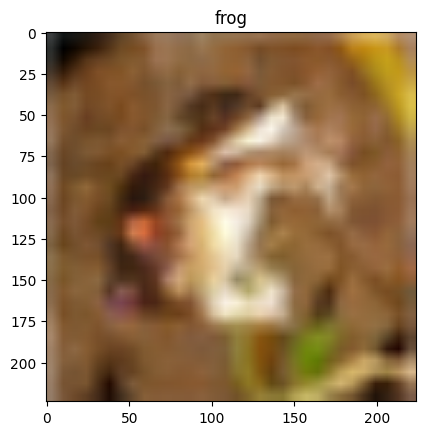

In [ ]:
image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.permute(2, 1, 0))
plt.title(classes_name[label])
plt.show()

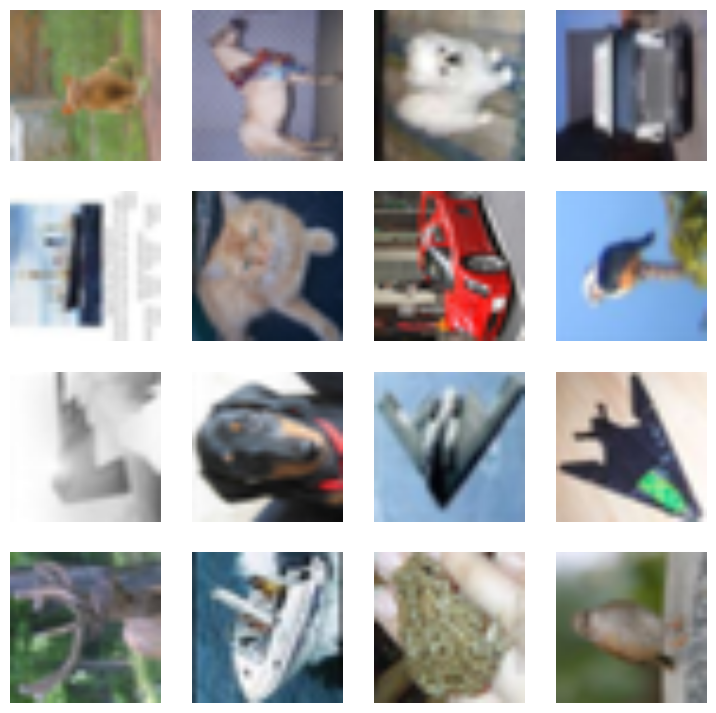

In [ ]:
# Plot more images
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.permute(2, 1, 0))
  # plt.title(classes_name[label])
  plt.axis(False);

# Splitting Data Into Batches

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_loader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_loader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

In [ ]:
mean = torch.zeros(3)
std = torch.zeros(3)
total_samples = 0

for data, _ in train_loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    total_samples += batch_samples

mean /= total_samples
std /= total_samples

transform1 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean = mean, std = std)
])

print(f"Mean is {mean}\nStd is {std} ")

Mean is tensor([0.4914, 0.4822, 0.4465])
Std is tensor([0.1953, 0.1925, 0.1942]) 


In [ ]:
train_data = datasets.CIFAR10(
    root = 'data',
    download = False,
    transform = transform1
)

test_data = datasets.CIFAR10(
    root = 'data',
    download = False,
    transform = transform1
)

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False, num_workers=2)

# Model

In [ ]:
class VGGNET(nn.Module):
  def __init__(self):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(64),
        nn.ReLU(True),
        nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(64),
        nn.ReLU(True),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(128),
        nn.ReLU(True),
        nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(128),
        nn.ReLU(True),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )

    self.block3 = nn.Sequential(
        nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(256),
        nn.ReLU(True),
        nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(256),
        nn.ReLU(True),
        nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(256),
        nn.ReLU(True),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )

    self.block4 = nn.Sequential(
        nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(512),
        nn.ReLU(True),
        nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(512),
        nn.ReLU(True),
        nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(512),
        nn.ReLU(True),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )

    self.block5 = nn.Sequential(
        nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(512),
        nn.ReLU(True),
        nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(512),
        nn.ReLU(True),
        nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(512),
        nn.ReLU(True),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 25088, out_features = 4096),
        nn.ReLU(True),
        nn.Dropout(p = 0.5),

        nn.Linear(in_features = 4096, out_features = 4096),
        nn.ReLU(True),
        nn.Dropout(p = 0.5),

        nn.Linear(in_features = 4096, out_features = 10)
    )

  def forward(self, x: torch.Tensor):
    x = self.block1(x)
    x = self.block2(x)
    x = self.block3(x)
    x = self.block4(x)
    x = self.block5(x)
    x = self.classifier(x)
    return x

model = VGGNET().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01, momentum = 0.9)

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

from timeit import default_timer as timer

def print_train_time(start: float, end: float):
  total_time = end - start
  print(f"Train time : {total_time:.3f} seconds")
  return total_time

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):

    model.to(device)
    train_loss, train_acc = 0, 0
    model.train()

    for batch, (X, y) in enumerate(data_loader):  # batch returns the batch no and (x,y) gives features and labels of that batch
        X, y = X.to(device), y.to(device)
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
        y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 200 == 0:
            print(f"Running on train_step on batch no - {batch + 1}")

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    model.to(device)

    test_loss, test_acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for batch, (X, y) in enumerate(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            loss = loss_fn(y_pred, y)
            test_loss += loss
            test_acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
            if batch % 200 == 0:
                print(f"Running on test_step on batch no - {batch + 1}")

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")
        return test_loss, test_acc

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  model.to(device)

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc
    loss /= len(data_loader)
    acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
    "model_loss": loss.item(),
    "model_acc": acc}



In [ ]:
torch.manual_seed(42)
train_acc = []
train_loss = []
test_acc = []
test_loss = []

#  Import tqdm for progress bar
from tqdm.auto import tqdm
from timeit import default_timer as timer

train_time_start_on_gpu = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    loss1 , acc1 = train_step(model = model,
                    data_loader = train_dataloader,
                    optimizer = optimizer,
                    loss_fn = loss_fn,
                    accuracy_fn = accuracy_fn)
    train_loss.append(loss1)
    train_acc.append(acc1)

    loss2 , acc2 = test_step(model = model,
                    data_loader = test_dataloader,
                    loss_fn = loss_fn,
                    accuracy_fn = accuracy_fn)
    test_loss.append(loss2)
    test_acc.append(acc2)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            )


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Running on train_step on batch no - 1
Running on train_step on batch no - 201
Running on train_step on batch no - 401
Running on train_step on batch no - 601
Running on train_step on batch no - 801
Running on train_step on batch no - 1001
Running on train_step on batch no - 1201
Running on train_step on batch no - 1401
Train loss: 5.21451 | Train accuracy: 21.65%


Running on test_step on batch no - 1
Running on test_step on batch no - 201
Running on test_step on batch no - 401
Running on test_step on batch no - 601
Running on test_step on batch no - 801
Running on test_step on batch no - 1001
Running on test_step on batch no - 1201
Running on test_step on batch no - 1401
Train loss: 2.49004 | Train accuracy: 28.23%
Train time : 1090.881 seconds
Epoch: 1
---------
Running on train_step on batch no - 1
Running on train_step on batch no - 201
Running on train_step on batch no - 401
Running on train_step on batch no - 601
Running on train_step on batch no - 801
Running 